In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.mixture import GaussianMixture
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dir_path = ('/content/drive/My Drive/GoIt/Magister/Numeric_Programming/World Happiness Report')

Mounted at /content/drive


In [72]:
!ls "{dir_path}"

2015.csv  2016.csv  2017.csv  2018.csv	2019.csv


In [73]:
data = pd.read_csv(f'{dir_path}/2019.csv')
print(data.head(10))
print(data.info())
display(data.describe())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   
5             6       Switzerland  7.480           1.452           1.526   
6             7            Sweden  7.343           1.387           1.487   
7             8       New Zealand  7.307           1.303           1.557   
8             9            Canada  7.278           1.365           1.505   
9            10           Austria  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                  

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


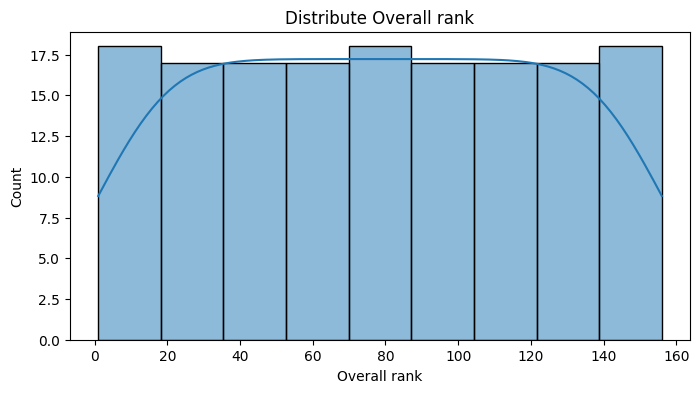

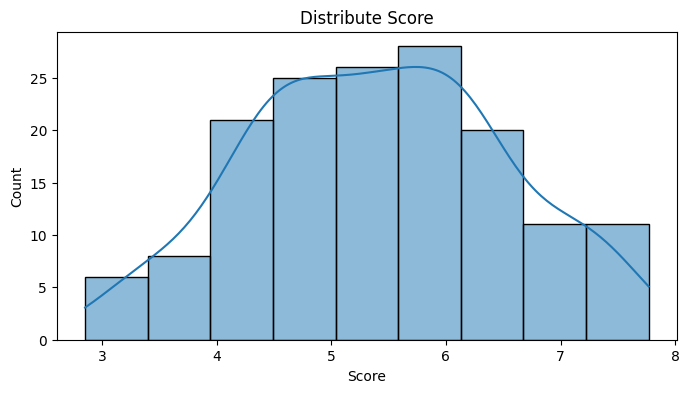

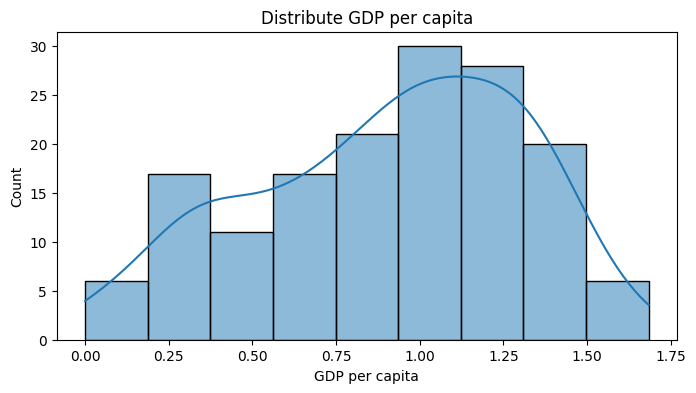

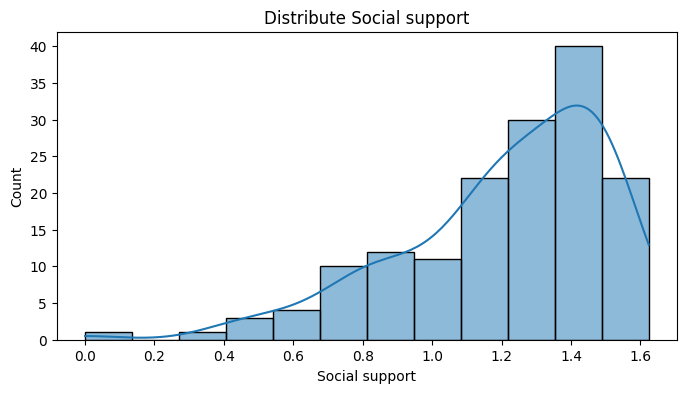

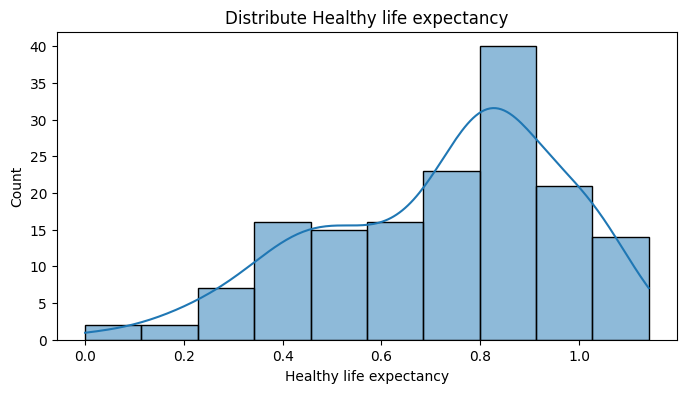

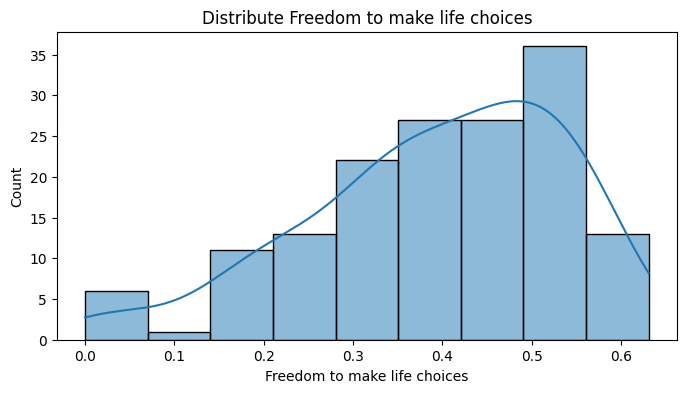

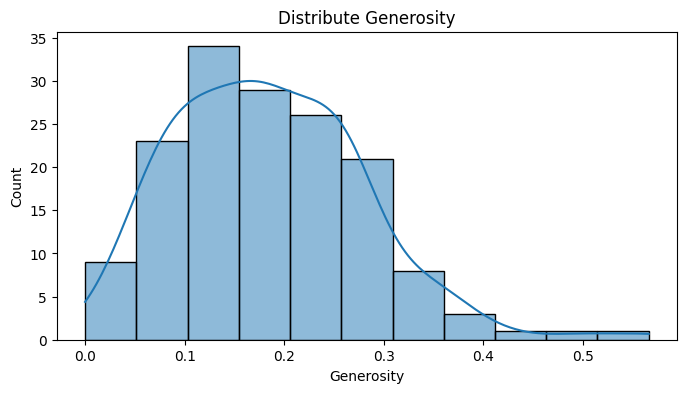

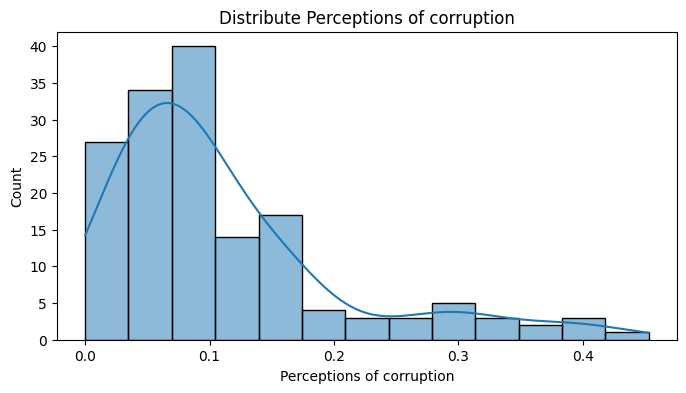

In [74]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribute {col}')
    plt.show()

In [75]:
data[numeric_cols].isnull().sum()
#data.dropna(inplace=True)

,0
Overall rank,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [76]:
data[numeric_cols].dtypes

,0
Overall rank,int64
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64


In [77]:
display(data.columns.tolist())

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

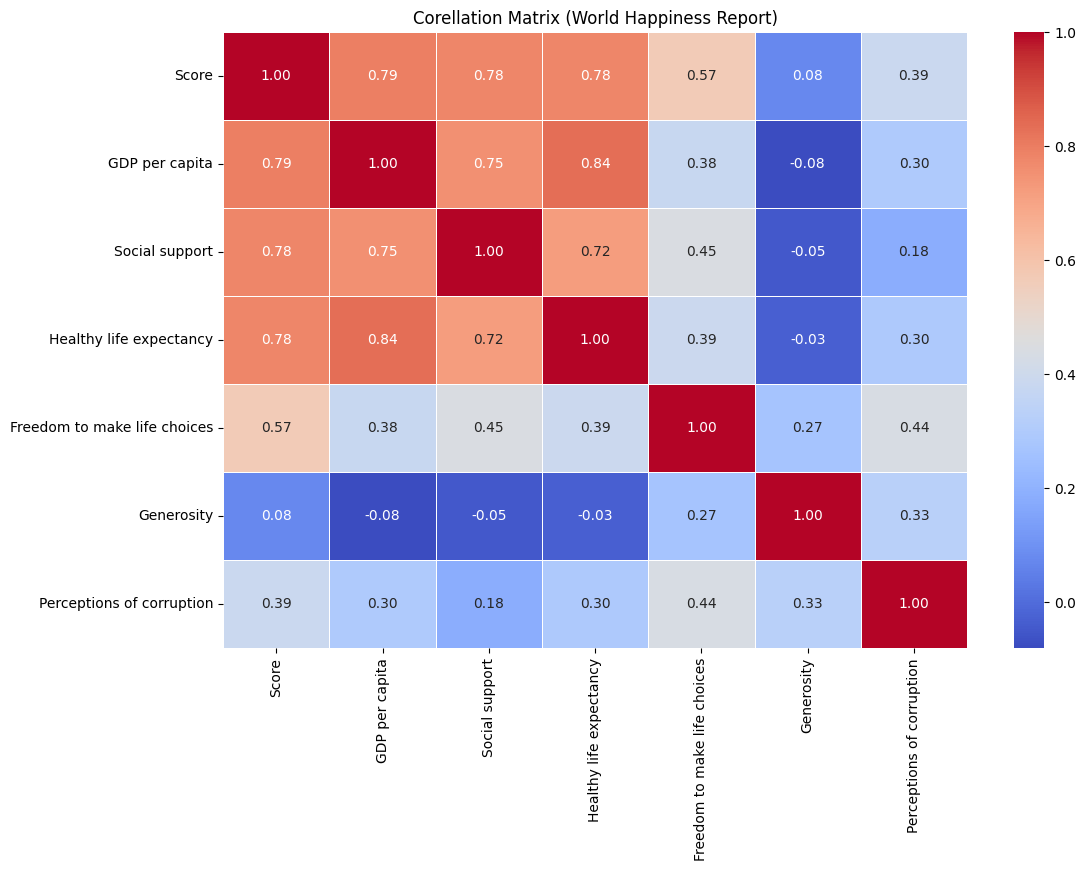

In [78]:
numeric_cols = ['Score', 'GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corellation Matrix (World Happiness Report)')
plt.show()

**CONCLUSIONS:**
1. We have strong corelation - more than 0.7:
  * Score and GDP per capita(economy)
  * Score and Social support(social support)
  * Score and Healthy life expectancy(life)
2. Weak corelation less than 0.3:
  * Generosity and Score(gererosity)
  * Freedom and Perceptions of corruption

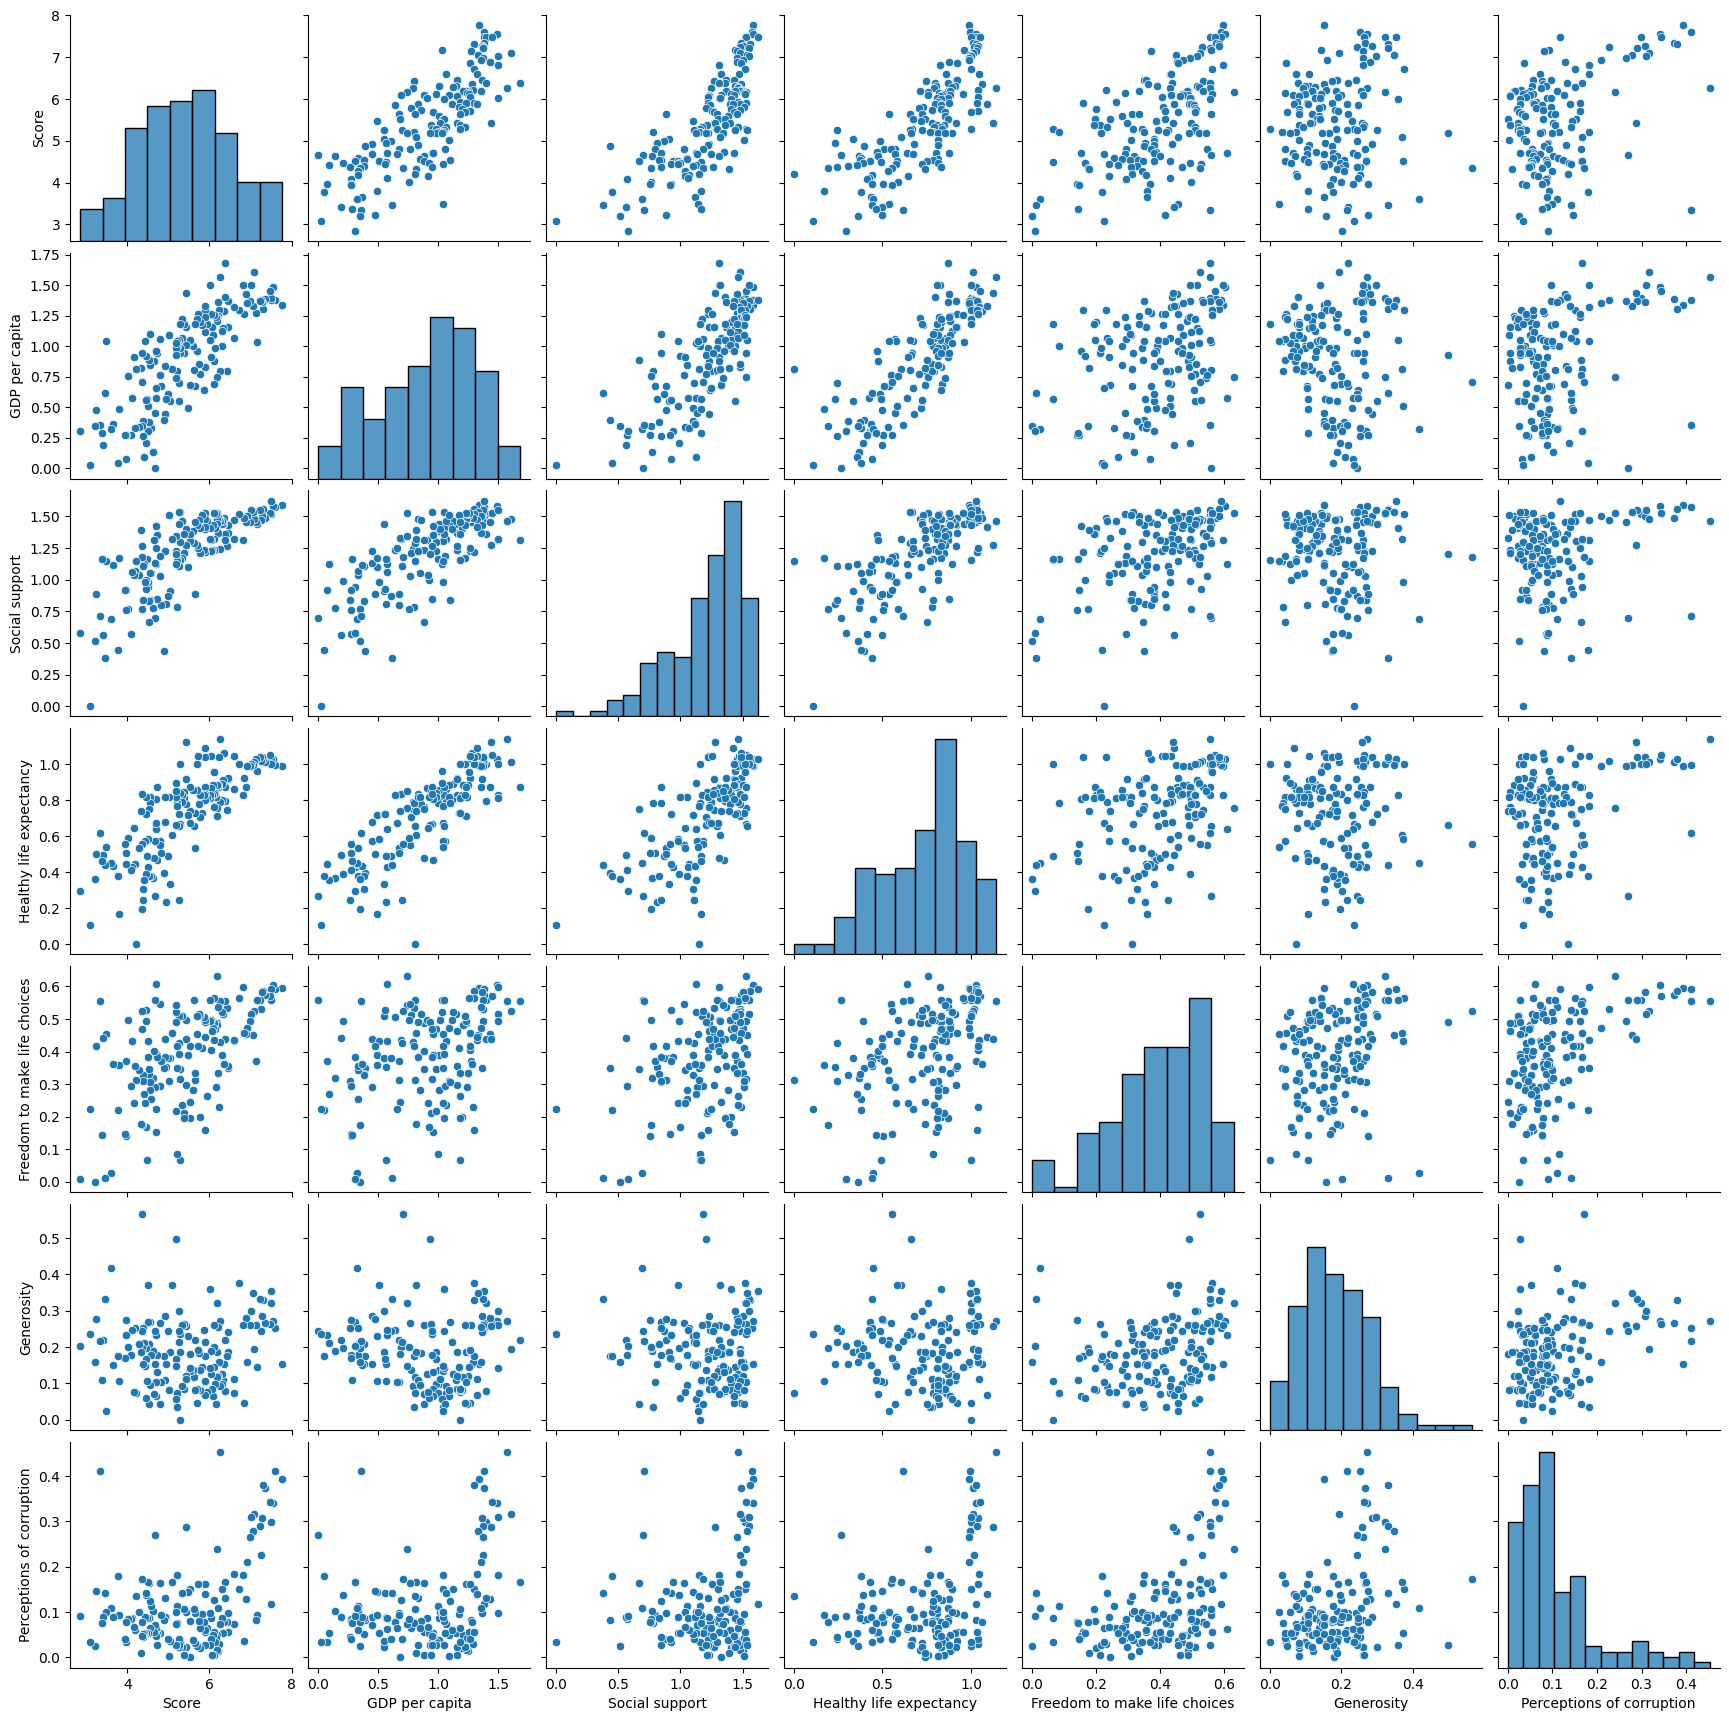

In [79]:
sns.pairplot(data[numeric_cols])
plt.show()

In [80]:
fig = px.choropleth(data,
                    locations = 'Country or region',
                    locationmode = 'country names',
                    color = 'Score',
                    title = 'Happiness Score by Country (2019)')
fig.show()

In [81]:
def data_scale(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
      scaler = StandardScaler()
    elif scaler_type == 'norm':
      scaler = Normalizer()
    return scaler.fit_transform(data)

numeric_data = data.select_dtypes(include=['float64', 'int64'])
data_scaled = data_scale(numeric_data, scaler_type = 'std')
df_scaled = pd.DataFrame(data_scaled, columns=numeric_data.columns)
display(df_scaled.head(10))

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.720983,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,-1.698777,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,-1.676571,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,-1.654365,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,-1.632158,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
5,-1.609952,1.868244,1.377079,1.063558,1.353888,1.256250,0.823117,2.466165
6,-1.587746,1.744770,1.213397,0.932787,1.175721,1.270252,0.865245,2.784520
7,-1.565540,1.712325,1.001869,1.167504,1.246159,1.347267,1.528762,2.858803
8,-1.543333,1.686188,1.157996,0.993143,1.300024,1.340266,1.054821,2.094751
9,-1.521127,1.657347,1.185697,0.892550,1.204725,0.976196,0.623009,1.224579


In [82]:
original_stats = data[numeric_cols].describe().round(6)
display('Original Data:\n', original_stats)

scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)
standardized_stats = data_standardized.describe().round(6)
display('\nStandatdized Data:\n', standardized_stats)

'Original Data:\n'

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


'\nStandatdized Data:\n'

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.003221,1.003221,1.003221,1.003221,1.003221,1.003221,1.003221
min,-2.301928,-2.279334,-4.053282,-3.004986,-2.748526,-1.946801,-1.173697
25%,-0.777431,-0.761494,-0.513240,-0.735430,-0.592108,-0.801445,-0.674940
50%,-0.024872,0.138129,0.210192,0.264169,0.171040,-0.077370,-0.266384
75%,0.700650,0.824336,0.817105,0.648471,0.802912,0.667770,0.325226
max,2.128711,1.961299,1.392163,1.722652,1.669330,4.014316,3.633468


In [83]:
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(df_scaled)
data['Cluster'] = clusters

In [84]:
fig = px.choropleth(data,
                    locations='Country or region',
                    color='Cluster',
                    locationmode='country names',
                    title='Clastering of countries by Happiness Score',
                    hover_name='Country or region',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

**CONCLUSION:**

Correlation analysis shows that happiness (Score) is most strongly associated with the economy, social support, and health. Factors such as generosity or corruption have a lesser impact.